# Salary Predictions Based on Job Description

# DEFINE THE PROBLEM

The goal of this project is to **predict salaries** for a new set of job posting, given an observation a set of job posting whit corresponding salaries. We want to build a model that predicts salaries based on job descriptions.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

# DISCOVER THE DATA

# 1. Load the data 
We have three dataset available in order to complete our prediction: 
* 1 test dataset (**'test_features.csv'**)  
* 2 training data sets (**'train_features.csv'** & **'train_salaries.csv'**).

We are going to brief explore all of them in order to have a broad vision of our data 

### **test_features.csv**

In [2]:
#explore the dataset: test_fratures.csv
test = pd.read_csv('test_features.csv')

In [3]:
test.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


The test dataset cointains 1M entries (or rows) and 8 columns

In [4]:
test.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


The first column represents the unique identifier for the posting and the other columns represents the features of the job posting:

* **jobid** unique identifier for the job posting, categorical variable
* **companyId**:unique identifier for the hiring company, categorical variable
* **jobType**: job title, categorical variable
* **degree**: highest level of education, categorical variable
* **major**: college major, categorical variable
* **industry**: type of industry, categorical variable
* **yearsExperience**: years of experience required, numerical variable
* **milesFromMetropolis**: distance between the jon location and the closest metropolis, numerical variable

### train_salaries.csv

This dataset contains all the salary values for the data included in our test dataset. The test and training data set have the same features. This is good. It means we don't need to rearrage them.

In [5]:
train_salary = pd.read_csv('train_salaries.csv')

In [6]:
train_salary.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [7]:
train_salary.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


1 M entries and two columns:
* **jobId** the unique identifier for the job posting, categorical variable, **link with the test dataset**
* **salary** salary, numerical variable, the variable we want to predict for the train_feature dataset

### train_features.csv

In [8]:
train_feature = pd.read_csv('train_features.csv')

In [9]:
train_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [10]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


This is **dataset** is specular to the test one and it is the one **we want to add salary predicted values.**

1 M rows and 8 columns as test dataset

# 2. Clean the data 

## Check for duplicates

In [11]:
test.duplicated().sum()

0

In [12]:
train_salary.duplicated().sum()

0

In [13]:
train_feature.duplicated().sum()

0

There aren't duplicated in the provided datasets

In [15]:
#numerical and categorical variables
train_feature.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [16]:
numeric_cols=['yearsExperience', 'milesFromMetropolis']

In [17]:
categorical_cols=['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

## Summarize numerical and categorical variable separately

Describe funtion: Generate descriptive statistics that summarize the central tendency,
dispersion and shape of a dataset's distribution, excluding
``NaN`` values.



In [18]:
#train_feature.describe()

train_feature.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [19]:
train_feature.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684774345,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


**jobId** is unique identifier for each record. It is randomly generated and it doesn't contain any info about the target variable. Not usefull to built or model

**companyId** there are 63 companies listed in our training dataset.

8 different **jobType**

5 **degree*

9 **major**

7 **industry** listed in our training dataset

Create a new data frame, merging of training data and targets

## Merge features and target into a single dataframe

In [22]:
train_df=pd.merge(train_feature, train_salary, on='jobId')

In [23]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


The new dataframe has now nine columns, including the salary per each jobId. and 1M rows as expected.

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In order to save space we can delete the old dataframes:

In [26]:
del train_feature
del train_salary

# 3. Explore the data (EDA) 

# Visualize target variable

The target variable (salary) is a numerical variable and we use seaborn library to visualize: 

* the univariate distribution of observations (LEFT) 
* the target box plot to show distributions with respect to categories (RIGHT).

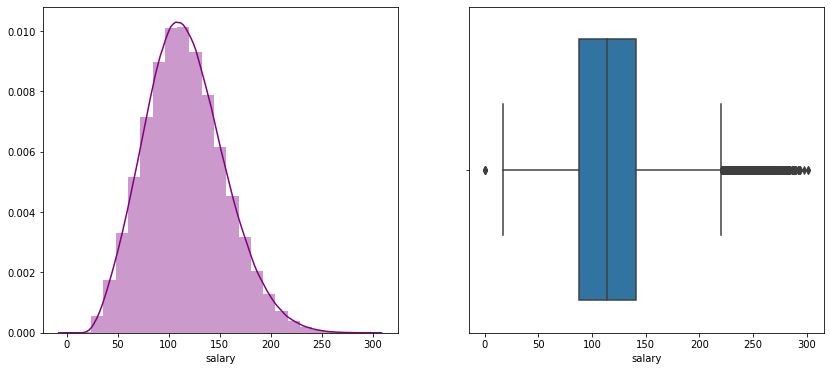

In [27]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.distplot(train_df.salary, bins=25, color='purple')
plt.subplot(1,2,2)
sns.boxplot(train_df.salary)

plt.show()

The average salary is around 105/110 K$. It is somewhat normal distribution. Potentially we have some outliers around 0. And we have potentially outliers after 220, we have a long tail. 

The boxplot reveals some outliers that we want investigate. They can be errors or valuable piece of information in order to correctly predict the salary variable for our test dataset. 

#  Identify potential outliers

In order to identify potential outliers we use the IQR (InterQuartile Range) rule.

In [28]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are UPPER {} and LOWER {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are UPPER 220.5 and LOWER 8.5.


## Potential outliers analysis

* **Outliers BELOW the LOWER bound**

In [29]:
#check potential outliers below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [30]:
len(train_df[train_df.salary < 8.5])

5

We analize the potential outliers below the lower bound (8.5). There are 5 job posts offering a **salary of 0** dollar. There are no clue those are volunteer positions therefor those are metadata with missing data in the job posting. They look like **missing data**  We are confident they are instances of missing/corrupt data and we need to remove them from the training set. We drop the info from the dataset.

In [32]:
#remove outliers < 8.5 from the training set
train_df = train_df[train_df.salary > 8.5]

In [33]:
#check outliers < 8.5 from the training set
len(train_df[train_df.salary < 8.5])

0

In [34]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


* **Outliers ABOVE the UPPER bound**

In [35]:
#check potential outliers above upper bound
train_df[train_df.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


In [36]:
len(train_df[train_df.salary > 220.5])

7117

In [37]:
train_df.salary.mean()

116.06239831199156

On the other hand, the outlier values above the upper bound are reasonable values in our data set. The salary range higher than the other values is giustifyed by the high degree level and more years of experiance required for the job listing. It is absolutely reasonable for our data set having 7117 metadata with higher values for the target variable. This data are legitimate and will not remove them.

In [38]:
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [39]:
#check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Even though those positions are classified as junior they require an high level of education, they all show decades of work experience and they are from OIL and FINANCE, mainly, that we assume pays very well. Conclision: the salary is higher than expected for an average junior position because the industry types offer better salaries.

# Features analysis

We make a plot for each features against:

* the distribution of samples on the feature (LEFT)
* the dependance of target variable salary on the feature (RIGHT)

In [41]:
#write a resuable function for plotting any information about yout features
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

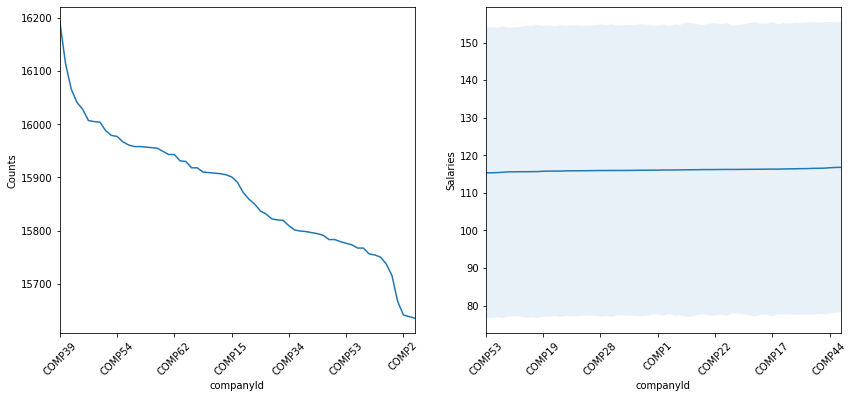

In [42]:
plot_feature(train_df, 'companyId')

The salary is weakly associated with companies. This feature is not predective of the target. We are not goint to use this feature in the training set.

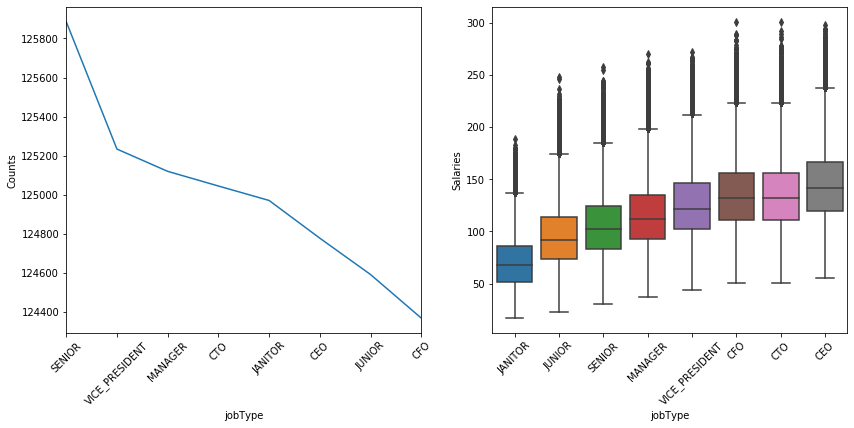

In [43]:
plot_feature(train_df, 'jobType')

There is a clear positive correlation between job type and salary.Moreover there is almost a linear relationship between this jobs. Linear model to explain later.

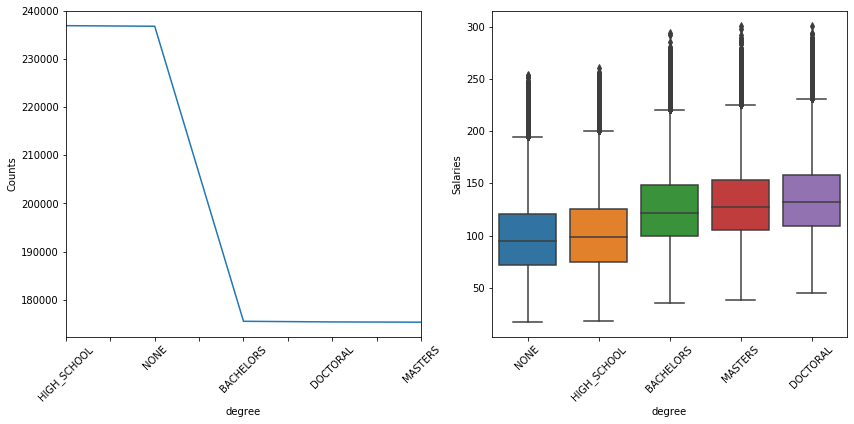

In [44]:
plot_feature(train_df, 'degree')

More advanced degrees tend to correspond to higher salary.

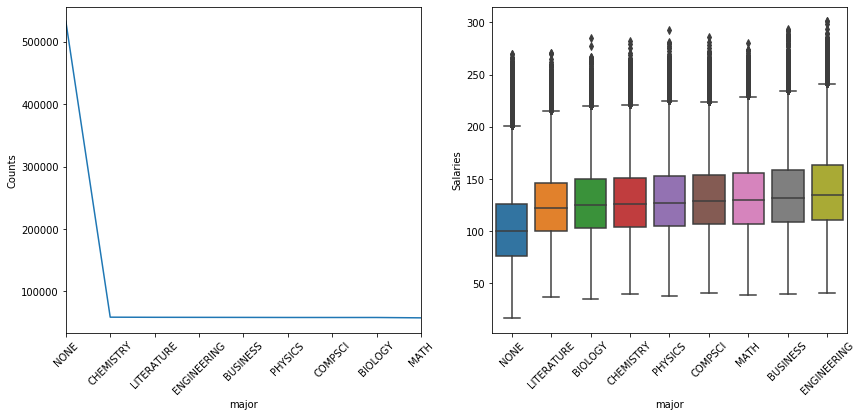

In [45]:
plot_feature(train_df, 'major')

People with major in engineering, business and math generally have higher salary. No major probably means no degree and they make less money than any other degree.

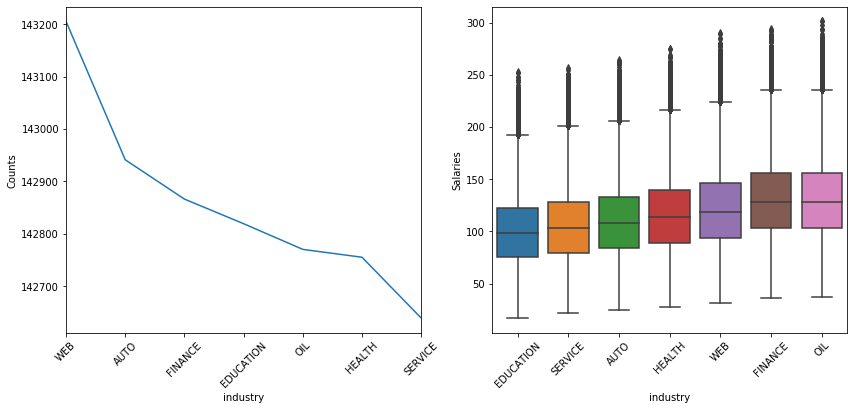

In [46]:
plot_feature(train_df, 'industry')

In general oil, finance and web industries pay better.

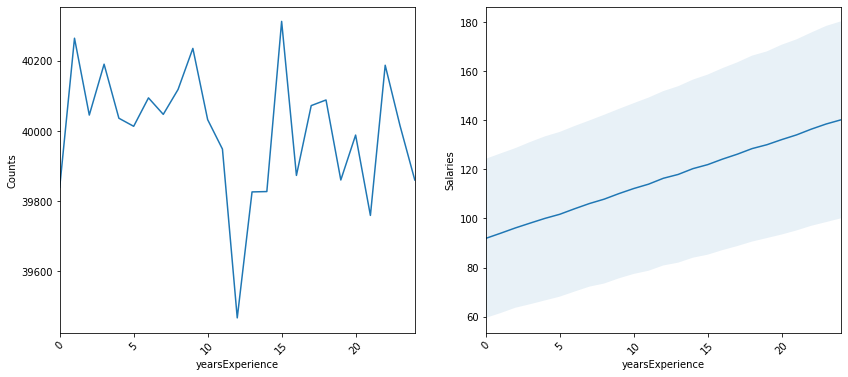

In [47]:
plot_feature(train_df, 'yearsExperience')

There is a clear correlation between year of experince and salary: salary increases with the year of experience linearly.

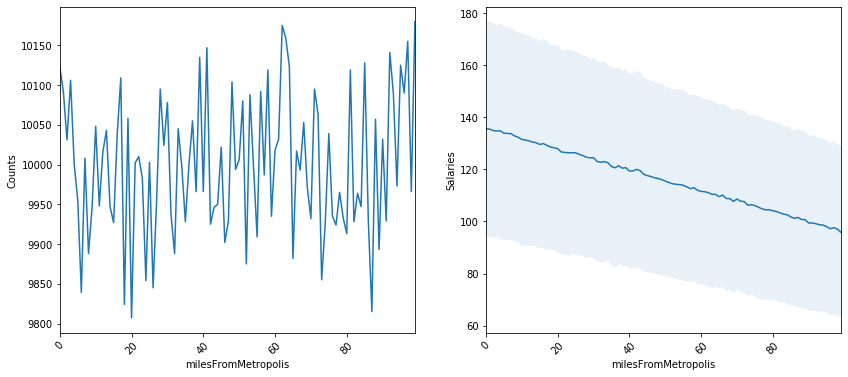

In [48]:
plot_feature(train_df, 'milesFromMetropolis')

Salaries decrease with the distance to metropolis.

# Correlation study


Correlations between selected features and response. We focus on correlation between features because it is going to influence the type of model what we will pick to model our prediction (is dimentionality reduction necessary? linear model vs non linear model, parametrical model vs non parametrical model) 

What are we going to do here is replacing all the cathegorical variable with the mean in order to treat them like numerical values.

HEAT MAP: higlight the correlation between featues.

In [51]:
#we replace all the category with their mean value
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [52]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

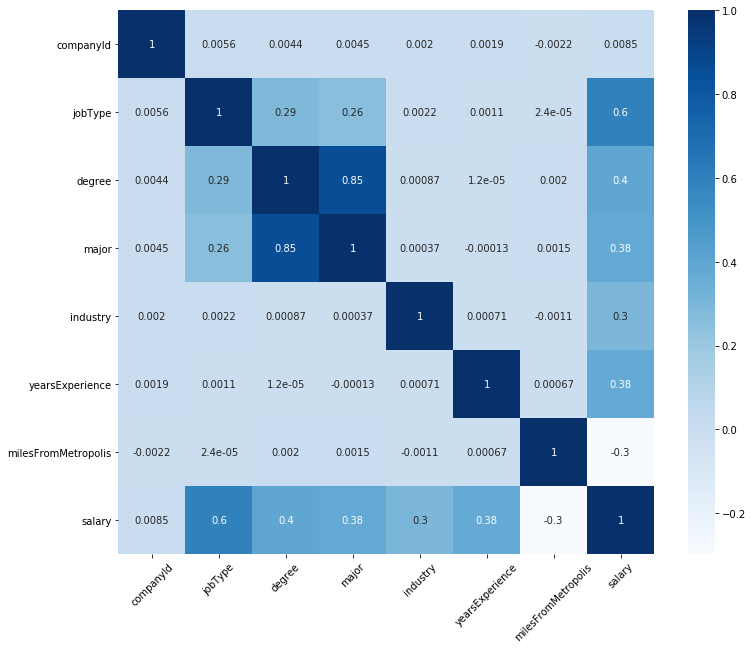

In [53]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

In order to encode the categories we use the salary mean value.

This graph highlights the correlation between each feature. 

**JobType** is most strongly correlated with **salary** (0.6), followed by degree (0.4), major and year of experience (both 0.38).
Among the features we see thar degree and major have strong correlation (0.85) and jobType has a moderate degree of correlation with both degree and major.

In [54]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


# 4. Establish a baseline


# Build the predective model

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

#import just the funtions that I need from the sklearn library
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
#helper funtions
def load_file(file):
    '''loads csv to pd dataframe'''
    return pd.read_csv(file)

def consolidate_data(df1, df2, key=None, left_index=False, right_index=False):
    '''perform inner join to return only records that are present in both dataframes'''
    return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)

def clean_data(raw_df):
    '''remove rows that contain salary <= 0 or duplicate job IDs'''
    clean_df = raw_df.drop_duplicates(subset='jobId')
    clean_df = clean_df[clean_df.salary>0]
    return clean_df

# create a new dataframe based on the categorical and numerical information
def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines result with continous variables'''
    cat_df = pd.get_dummies(df[cat_vars])# bynery incoded
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False)

#it returns the dataframe and slice it on targets
def get_target_df(df, target):
    '''returns target dataframe'''
    return df[target]

#important funtion: we passa the models in and the data in to help us compare the models
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)

# it prints a summary for each model we investigated
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')


Real code

In [ ]:
if __name__ == '__main__':
    #define inputs
    train_feature_file = 'data/train_features.csv'
    train_target_file = 'data/train_salaries.csv'
    test_feature_file = 'data/test_features.csv'

    #define variables
    categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
    numeric_vars = ['yearsExperience', 'milesFromMetropolis']
    target_var = 'salary'

    #load data
    print("Loading data")
    feature_df = load_file(train_feature_file)
    target_df = load_file(train_target_file)
    test_df = load_file(test_feature_file)

    #consolidate training data
    raw_train_df = consolidate_data(feature_df, target_df, key='jobId')

    #clean, shuffle, and reindex training data -- shuffling may improve cross-validation accuracy
    clean_train_df = shuffle(clean_data(raw_train_df)).reset_index()

    #encode categorical data and get final feature dfs
    print("Encoding data")
    feature_df = one_hot_encode_feature_df(clean_train_df, cat_vars=categorical_vars, num_vars=numeric_vars)
    test_df = one_hot_encode_feature_df(test_df, cat_vars=categorical_vars, num_vars=numeric_vars)

    #get target df
    target_df = get_target_df(clean_train_df, target_var)

    #initialize model list and dicts keep track of those info
    models = []
    mean_mse = {} #mean square error
    cv_std = {}
    res = {} #resudials we dont track them

    #define number of processes to run in parallel. core of you machine is king here
    num_procs = 2

    #shared model paramaters
    verbose_lvl = 5

    #create models -- hyperparameter tuning already done by hand for each model
    #based on many linear beahvior seen during EDA we think LR could be a good model
    lr = LinearRegression()
    lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    #tuning by hand. Try and rearrange, max_depth=25,  max_features=30 . n_estimators=60 has to be high
    rf = RandomForestRegressor(n_estimators=60, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                               max_features=30, verbose=verbose_lvl)
    gbm = GradientBoostingRegressor(n_estimators=40, max_depth=5, loss='ls', verbose=verbose_lvl)

    models.extend([lr, lr_std_pca, rf, gbm])

    #parallel cross-validate models, using MSE as evaluation metric, and print summaries
    print("Beginning cross validation")
    for model in models:
        train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std)
        print_summary(model, mean_mse, cv_std)

    #choose model with lowest mse
    model = min(mean_mse, key=mean_mse.get)
    print('\nPredictions calculated using model with lowest MSE:')
    print(model)

    #train model on entire dataset
    model.fit(feature_df, target_df)

    #create predictions based on test data
    predictions = model.predict(test_df)

    #store feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        #linear models don't have feature_importances_
        importances = [0]*len(feature_df.columns)

    feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    
    #set index to 'feature'
    feature_importances.set_index('feature', inplace=True, drop=True)
    
    #create plot
    feature_importances[0:25].plot.bar(figsize=(20,10))
    plt.show()

    #save results
    save_results(model, mean_mse[model], predictions, feature_importances)

In [ ]:
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

## Establish a baseline

In [ ]:
#is it train_df equal to clean_train_df from the example?
train_df.head()
# WE REMOVED JOBID because doesn'rt any value for our investigation EDA consideration above

In [ ]:
clean_train_df.head()

In [ ]:
clean_train_df.info()

In [ ]:
train_df.groupby('industry').mean()
#industry_mean_value = train_df.groupby('industry')['salary'].mean().to_dict()
#industry_mean_value

In [ ]:
#calculate industry mean for each industry and put them into a dictionary
industry_mean_value = clean_train_df.groupby('industry')['salary'].mean().to_dict()
industry_mean_value

Finance an Oil industries have the highest paying salary and they both pay around 130K

In [ ]:
#create a simplest model by assigning to each job posting a mean salary of corresponding industry

#create a copy of the clean train data frame
ctdf_copy = clean_train_df.copy()

#create a new column named 'Industry average'
ctdf_copy['industry mean value'] = ''

#loop through the rows of the data frame assigning values for the new column by taking them from the dictionary
#created above and look to the first 10 rows of a new data frame
for index in range(len(ctdf_copy)):
    ctdf_copy['industry mean value'].values[index]=industry_mean_value[ctdf_copy['industry'].values[index]]
ctdf_copy.head(10)

In [ ]:
#build a plot showing distribution of actual values vs predicted ones 
def predict_plot(test,predict):
    plt.figure(figsize=(17, 8))

    ax1 = sns.distplot(test, hist=False, color="r", label="Actual Values")
    sns.distplot(predict, hist=False, color="b", label="Predicted Values" , ax=ax1)

    plt.title('Actual vs Predicted Values for Salary')
    plt.xlabel('Salary')
    plt.ylabel('Proportion of job postings')

In [ ]:
predict_plot(clean_train_df['salary'],ctdf_copy['industry mean value'])

This plot is showing how our simplest predictioning model works. Each peak represents one out of seven industries in the data set. Also is known that two industries Oil and Finance have the same mean salary so they are stacked one over another creating one high peak. Also as an additional information it is visualy seen that proportion of job postings of each industry in the data set is roughly the same.

In [ ]:
#import libraries and metrics to measure efficacy of the model
#in this case choose mean squared error as a metric
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
#create kfold object in order to split train data set in 5 equal subsets
kfold = KFold(5,True,1)
kfold

In [ ]:
#measure MSE during 5-fold cross-validation
mse = []
for train,test in kfold.split(ctdf_copy):
    mse1 = mean_squared_error(ctdf_copy['salary'].values[train],ctdf_copy['industry mean value'].values[train])
    print(mse1)
    mse.append(mse1)
print('MSE mean:',np.mean(mse))

Now we have a **baseline value** for comparison and to measure efficacy of future models.

# 5. Hypothesize solution

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

## Part 3 - DEVELOP

In [ ]:
train_df.head()